In [1]:
def getSize(array):
    return len(array)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,f1_score,PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn import metrics

#Regression Model

#prep data and encoder
encoder = preprocessing.OrdinalEncoder()
housing = pd.read_csv('housing.csv')

#load linear model
housing_model = LinearRegression()

#sort and split data
housing.head()
housing.dropna(inplace=True)

housing_X = housing.drop("median_house_value", axis=1)
housing_Y = housing.pop("median_house_value")
encoded_housing_X = encoder.fit_transform(housing_X)# preprocess for textual data


#PreProcess Housing
scalerX = preprocessing.StandardScaler()
scaledX =scalerX.fit_transform(encoded_housing_X)

housing_Y=pd.DataFrame(housing_Y)

scalerY=preprocessing.StandardScaler()
scaledY =scalerY.fit_transform(housing_Y.values.reshape(-1,1))

housing_x=pd.DataFrame(scaledX)

#train and test
housing_Xtrain,housing_Xtest,housing_Ytrain,housing_Ytest = train_test_split(scaledX,scaledY,test_size=0.2)
print("Size of X_Train:{0}" .format(len(housing_Xtrain)))
print("Size of X_Test:{0}" .format(len(housing_Xtest)))
print("Size of Y_Train:{0}" .format(len(housing_Ytrain)))
print("Size of Y_Test:{0}" .format(len(housing_Ytest)))

housing_model.fit(housing_Xtrain,housing_Ytrain)
print("model coefficients: ",housing_model.coef_)
print("model intercept: ",housing_model.intercept_)
median_house_value_predictions = housing_model.predict(housing_Xtest)

#metrics
r2 =metrics.r2_score(housing_Ytest, median_house_value_predictions)
MSE = metrics.mean_squared_error(housing_Ytest, median_house_value_predictions)
print("R2:",r2,"\nMSE: ",MSE)


Size of X_Train:16346
Size of X_Test:4087
Size of Y_Train:16346
Size of Y_Test:4087
model coefficients:  [[-0.77036211 -0.82610238  0.15067362 -0.00115935  0.41654945 -0.45298797
   0.08098505  0.60194428 -0.01589171]]
model intercept:  [-0.0024556]
R2: 0.5985703346145852 
MSE:  0.3972664616822977


The R^2 score tells us that the model some-what fits the data. While not close to one it is beyond .5 thus showing there is some significance to the model in regard to the data.

Size of X_Train:36000
Size of X_Test:9000
Size of Y_Train:36000
Size of Y_Test:9000
Coeffs: [[-1.50337235e-02 -1.06493006e-01 -4.00906949e-02 -5.67622997e-06
   2.12308405e-02  1.55748435e-01 -5.92899440e-04 -1.68775772e-01
   2.54723719e-03  1.36102943e-01 -1.07539517e-02 -9.44989981e-03
  -2.56232185e+00]]
Intercept [-0.44792901]
Accuracy:
[0.895      0.89333333 0.88722222 0.89       0.89666667]
Recall Score:
0.6920762286860582
Precision Score:
0.7967667436489607
F1 Score:
0.7407407407407407
Cross-Entropy Score:
0.25088756698623044


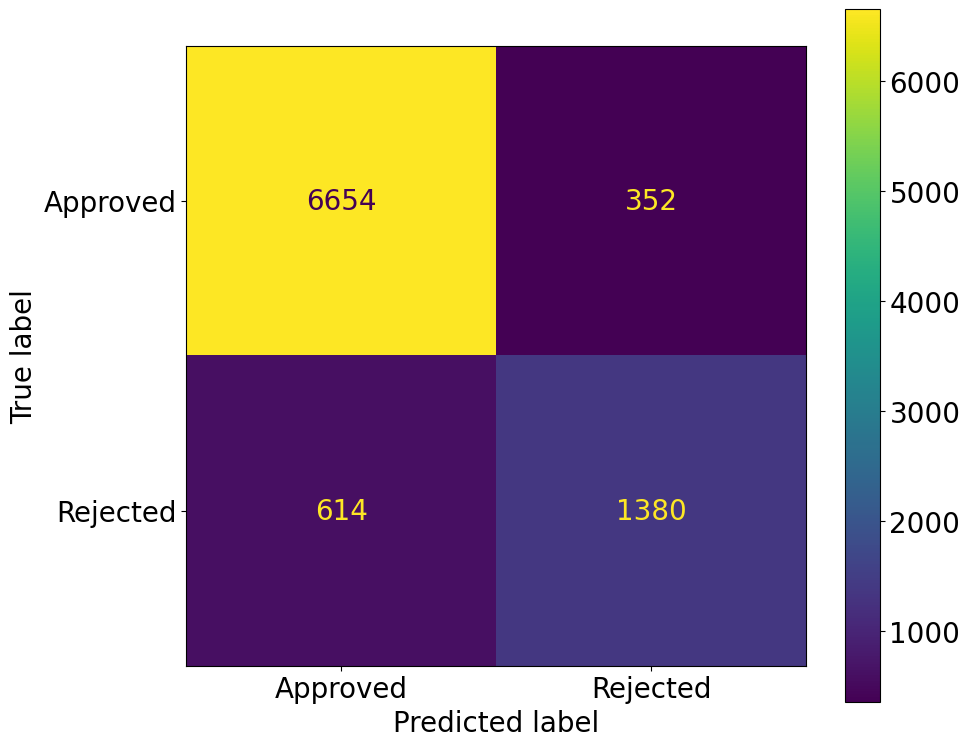

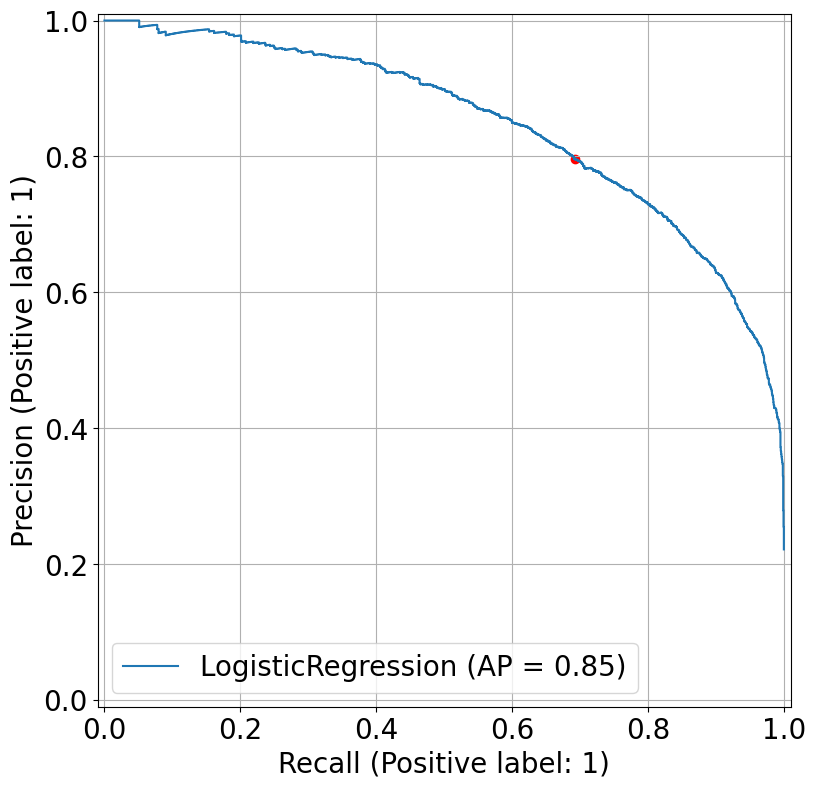

In [7]:
#Classification

loanSet = pd.read_csv('loan.csv')
#loan_model = LogisticRegression(random_state=42, solver='liblinear')
loanSet.head()
loanSet.dropna(inplace=True)
#sort variables
loan_X = loanSet.drop("loan_status",axis=1) #input
loan_Y = loanSet.pop("loan_status")#output

#load and set model
loan_model= LogisticRegression(random_state=12, solver='liblinear')

#encode textual data
encoded_loan = preprocessing.OrdinalEncoder()
encoded_loan_X = encoded_loan.fit_transform(loan_X)
#split data
loan_X_train, loan_X_test, loan_Y_train, loan_Y_test = train_test_split(encoded_loan_X, loan_Y, test_size=0.2)

#sizes
print("Size of X_Train:{0}" .format(len(loan_X_train)))
print("Size of X_Test:{0}" .format(len(loan_X_test)))
print("Size of Y_Train:{0}" .format(len(loan_Y_train)))
print("Size of Y_Test:{0}" .format(len(loan_Y_test)))

#fit model
loan_model.fit(loan_X_train,loan_Y_train)
print("Coeffs:",loan_model.coef_)
print("Intercept",loan_model.intercept_)

#test model
loan_approval_predictions = loan_model.predict(loan_X_test)

#score model
ConfusionMatrixDisplay.from_predictions(loan_Y_test,loan_approval_predictions, display_labels=['Approved','Rejected'])
print("Accuracy:")
print(cross_val_score(loan_model, loan_X_test, loan_Y_test, cv=5, scoring='accuracy'))
print("Recall Score:")
print(recall_score(loan_Y_test, loan_approval_predictions))
print("Precision Score:")
print(precision_score(loan_Y_test, loan_approval_predictions))
print("F1 Score:")
print(f1_score(loan_Y_test, loan_approval_predictions))
print("Cross-Entropy Score:")
Y_pred=loan_model.predict_proba(loan_X_test)[:,1]



print(metrics.log_loss(loan_Y_test, Y_pred))

#plot precision and recall
plt.rcParams.update({'font.size': 20,"figure.figsize":(10,9)})

PrecisionRecallDisplay.from_estimator(loan_model, loan_X_test,loan_Y_test)
plt.scatter(recall_score(loan_Y_test, loan_approval_predictions),precision_score(loan_Y_test, loan_approval_predictions),c='r',label='Precision')
plt.grid()
plt.show()